In [3]:
import pandas as pd
import tiktoken
from openai import OpenAI
from dotenv import load_dotenv

In [4]:
input_datapath = "data/fine_food_reviews_1k.csv"
df = pd.read_csv(input_datapath, index_col=0)
df = df[["Time", "ProductId", "UserId", "Score", "Summary", "Text"]]
df = df.dropna()

df["combined"] = (
    "Title: " + df.Summary.str.strip() + "; Content: " + df.Text.str.strip()
)
df.head(2)

,Time,ProductId,UserId,Score,Summary,Text,combined
0,1351123200,B003XPF9BO,A3R7JR3FMEBXQB,5,where does one start...and stop... with a tre...,Wanted to save some to bring to my Chicago fam...,Title: where does one start...and stop... wit...
1,1351123200,B003JK537S,A3JBPC3WFUT5ZP,1,Arrived in pieces,"Not pleased at all. When I opened the box, mos...",Title: Arrived in pieces; Content: Not pleased...


In [5]:
df["combined"]

0      Title: where does one  start...and stop... wit...
1      Title: Arrived in pieces; Content: Not pleased...
2      Title: It isn't blanc mange, but isn't bad . ....
3      Title: These also have SALT and it's not sea s...
4      Title: Happy with the product; Content: My dog...
                             ...                        
995    Title: Delicious!; Content: I have ordered the...
996    Title: Good Training Treat; Content: My dog wi...
997    Title: Jamica Me Crazy Coffee; Content: Wolfga...
998    Title: Party Peanuts; Content: Great product f...
999    Title: I love Maui Coffee!; Content: My first ...
Name: combined, Length: 1000, dtype: object

In [10]:
embedding_model = "text-embedding-ada-002"
# encoding = tiktoken.encoding_for_model(embedding_model)
# print(encoding.name)
embedding_encoding = "cl100k_base"
max_tokens = 8000

In [19]:
top_n = 1000
df = df.sort_values("Time").tail(top_n * 2)
df.drop("Time", axis=1, inplace=True)
encoding = tiktoken.get_encoding(embedding_encoding)

df["n_tokens"] = df.combined.apply(lambda x: len(encoding.encode(x)))

df = df[df.n_tokens <= max_tokens].tail(top_n)

len(df)

1000

In [20]:
_ = load_dotenv()
client = OpenAI()

In [21]:
res = client.embeddings.create(input="abc", model=embedding_model)
print(res.data[0].embedding)

[0.002615210600197315, -0.011296011507511139, -0.00963275134563446, -0.039097219705581665, -0.03448256105184555, 0.012145334854722023, -0.021303880959749222, -0.02280435338616371, 0.018685130402445793, -0.00038153232890181243, 0.0033760634250938892, 0.019194725900888443, -0.0026983735151588917, -0.004526189994066954, -0.018840840086340904, 0.0029708649963140488, 0.027093440294265747, 0.010666095651686192, 0.010800572112202644, 0.007530673872679472, -0.014537598006427288, 0.01776503026485443, -0.0069786133244633675, -0.01562756486237049, -0.020199758931994438, -0.003558314172551036, 0.009993714280426502, -0.020058205351233482, 0.026272427290678024, -0.007325420621782541, 0.00774300517514348, 0.013787361793220043, -0.007459897082298994, -0.009944169782102108, -0.010397142730653286, -0.014219101518392563, -0.013645808212459087, -0.015924828127026558, 0.010382987558841705, -0.00026408673147670925, 0.024347292259335518, 0.0045155733823776245, 0.014098781161010265, -0.022960063070058823, -0.

In [22]:
def embedding_text(text, model="text-embedding-ada-002"):
    res = client.embeddings.create(input=text, model=model)
    return res.data[0].embedding

In [23]:
df["embedding"] = df.combined.apply(embedding_text)
output_datapath = "data/fine_food_reviews_with_embeddings_1k_0402.csv"
df.to_csv(output_datapath)

In [24]:
e0 = df["embedding"][0]
e0

[0.007000929210335016,
 -0.027453815564513206,
 0.010571849532425404,
 -0.014572381041944027,
 0.0044095199555158615,
 0.019988907501101494,
 0.0007045608945190907,
 -0.022064784541726112,
 -0.01924654096364975,
 -0.013534442521631718,
 0.018078001216053963,
 0.0040280260145664215,
 -0.03302156552672386,
 0.0001496117765782401,
 0.01585090160369873,
 0.01945275440812111,
 0.017816798761487007,
 -0.026312770321965218,
 -0.01938401535153389,
 -0.025130484253168106,
 -0.04753895476460457,
 -0.007244947832077742,
 0.023783225566148758,
 -0.008633448742330074,
 -0.009018379263579845,
 0.011396701447665691,
 0.02958468347787857,
 -0.022490957751870155,
 -0.010166297666728497,
 0.02167985402047634,
 0.0011479186359792948,
 0.009080243296921253,
 -0.01330073457211256,
 -0.01733563467860222,
 -0.005763651803135872,
 -0.010929285548627377,
 -0.026477741077542305,
 0.007396170869469643,
 0.022587191313505173,
 -0.02029135264456272,
 0.018985338509082794,
 -0.015424727462232113,
 0.009320824407041

In [26]:
df_embedded = pd.read_csv(output_datapath, index_col=0)

In [27]:
df_embedded["embedding"]

0      [0.007000929210335016, -0.027453815564513206, ...
23     [-0.018311146646738052, -0.01569903828203678, ...
217    [-0.010458837263286114, -0.013450792990624905,...
1      [-0.023633742704987526, -0.011830238625407219,...
2      [0.0001991958706639707, 0.005254689138382673, ...
                             ...                        
996    [-0.024556949734687805, -0.01762823946774006, ...
997    [-0.016896171495318413, -0.005281670950353146,...
718    [-0.012413795106112957, -0.005821947008371353,...
991    [0.0042394306510686874, -0.01211639679968357, ...
999    [-0.006076459307223558, -0.01514881569892168, ...
Name: embedding, Length: 1000, dtype: object

In [28]:
len(df_embedded["embedding"][0])

34374

In [29]:
type(df_embedded["embedding"][0])

str

In [30]:
df_embedded["embedding"][0]

'[0.007000929210335016, -0.027453815564513206, 0.010571849532425404, -0.014572381041944027, 0.0044095199555158615, 0.019988907501101494, 0.0007045608945190907, -0.022064784541726112, -0.01924654096364975, -0.013534442521631718, 0.018078001216053963, 0.0040280260145664215, -0.03302156552672386, 0.0001496117765782401, 0.01585090160369873, 0.01945275440812111, 0.017816798761487007, -0.026312770321965218, -0.01938401535153389, -0.025130484253168106, -0.04753895476460457, -0.007244947832077742, 0.023783225566148758, -0.008633448742330074, -0.009018379263579845, 0.011396701447665691, 0.02958468347787857, -0.022490957751870155, -0.010166297666728497, 0.02167985402047634, 0.0011479186359792948, 0.009080243296921253, -0.01330073457211256, -0.01733563467860222, -0.005763651803135872, -0.010929285548627377, -0.026477741077542305, 0.007396170869469643, 0.022587191313505173, -0.02029135264456272, 0.018985338509082794, -0.015424727462232113, 0.009320824407041073, -0.008282885886728764, 0.00180092628

In [31]:
import ast

df_embedded["embedding_vec"] = df_embedded["embedding"].apply(ast.literal_eval)

In [32]:
len(df_embedded["embedding_vec"][0])

1536

In [33]:
df_embedded.head(2)

,ProductId,UserId,Score,Summary,Text,combined,n_tokens,embedding,embedding_vec
0,B003XPF9BO,A3R7JR3FMEBXQB,5,where does one start...and stop... with a tre...,Wanted to save some to bring to my Chicago fam...,Title: where does one start...and stop... wit...,52,"[0.007000929210335016, -0.027453815564513206, ...","[0.007000929210335016, -0.027453815564513206, ..."
23,B008FHUGNQ,A3NIBMLKUK73JC,5,Great flavor no bite,This coffee is a favorite of mine and many oth...,Title: Great flavor no bite; Content: This cof...,33,"[-0.018311146646738052, -0.01569903828203678, ...","[-0.018311146646738052, -0.01569903828203678, ..."


In [36]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.manifold import TSNE

In [37]:
type(df_embedded["embedding_vec"])

pandas.core.series.Series

In [38]:
assert df_embedded['embedding_vec'].apply(len).nunique() == 1

In [39]:
# 将嵌入向量列表转换为二维数组
matrix = np.vstack(df_embedded['embedding_vec'].values)

In [40]:
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)

In [41]:
vis_dims = tsne.fit_transform(matrix)

In [42]:
colors = ["red", "darkorange", "gold", "turquoise", "darkgreen"]

In [43]:
x = [x for x,y in vis_dims]
y = [y for x,y in vis_dims]

color_indices = df_embedded.Score.values - 1

assert len(vis_dims) == len(df_embedded.Score.values)

Text(0.5, 1.0, 'Amazon ratings visualized in language using t-SNE')

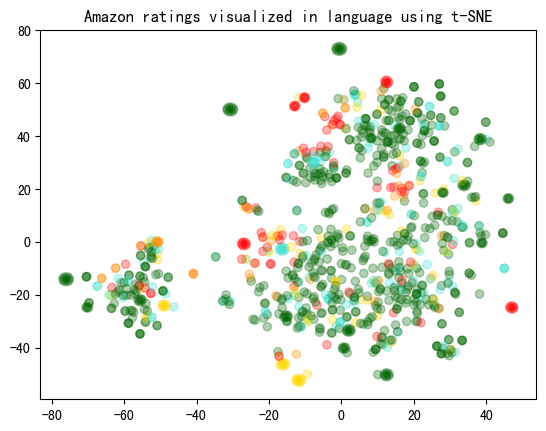

In [44]:
# 创建一个基于预定义颜色的颜色映射对象
colormap = matplotlib.colors.ListedColormap(colors)
# 使用 matplotlib 创建散点图，其中颜色由颜色映射对象和颜色索引共同决定，alpha 是点的透明度
plt.scatter(x, y, c=color_indices, cmap=colormap, alpha=0.3)

# 为图形添加标题
plt.title("Amazon ratings visualized in language using t-SNE")

# 使用 K-Means 聚类，然后使用 t-SNE 可视化

In [45]:
import numpy as np
# 从 scikit-learn中导入 KMeans 类。KMeans 是一个实现 K-Means 聚类算法的类。
from sklearn.cluster import KMeans

# np.vstack 是一个将输入数据堆叠到一个数组的函数（在垂直方向）。
# 这里它用于将所有的 ada_embedding 值堆叠成一个矩阵。
# matrix = np.vstack(df.ada_embedding.values)

# 定义要生成的聚类数。
n_clusters = 4

# 创建一个 KMeans 对象，用于进行 K-Means 聚类。
# n_clusters 参数指定了要创建的聚类的数量；
# init 参数指定了初始化方法（在这种情况下是 'k-means++'）；
# random_state 参数为随机数生成器设定了种子值，用于生成初始聚类中心。
# n_init=10 消除警告 'FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4'
kmeans = KMeans(n_clusters = n_clusters, init='k-means++', random_state=42, n_init=10)

# 使用 matrix（我们之前创建的矩阵）来训练 KMeans 模型。这将执行 K-Means 聚类算法。
kmeans.fit(matrix)

# kmeans.labels_ 属性包含每个输入数据点所属的聚类的索引。
# 这里，我们创建一个新的 'Cluster' 列，在这个列中，每个数据点都被赋予其所属的聚类的标签。
df_embedded['Cluster'] = kmeans.labels_

In [46]:
df_embedded['Cluster']

0      0
23     1
217    1
1      0
2      2
      ..
996    3
997    1
718    0
991    1
999    1
Name: Cluster, Length: 1000, dtype: int32

In [47]:
df_embedded.head(2)

,ProductId,UserId,Score,Summary,Text,combined,n_tokens,embedding,embedding_vec,Cluster
0,B003XPF9BO,A3R7JR3FMEBXQB,5,where does one start...and stop... with a tre...,Wanted to save some to bring to my Chicago fam...,Title: where does one start...and stop... wit...,52,"[0.007000929210335016, -0.027453815564513206, ...","[0.007000929210335016, -0.027453815564513206, ...",0
23,B008FHUGNQ,A3NIBMLKUK73JC,5,Great flavor no bite,This coffee is a favorite of mine and many oth...,Title: Great flavor no bite; Content: This cof...,33,"[-0.018311146646738052, -0.01569903828203678, ...","[-0.018311146646738052, -0.01569903828203678, ...",1


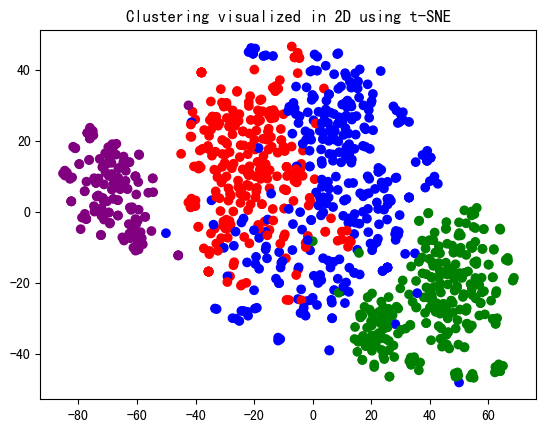

In [48]:
# 首先为每个聚类定义一个颜色。
colors = ["red", "green", "blue", "purple"]

# 然后，你可以使用 t-SNE 来降维数据。这里，我们只考虑 'embedding_vec' 列。
tsne_model = TSNE(n_components=2, random_state=42)
vis_data = tsne_model.fit_transform(matrix)

# 现在，你可以从降维后的数据中获取 x 和 y 坐标。
x = vis_data[:, 0]
y = vis_data[:, 1]

# 'Cluster' 列中的值将被用作颜色索引。
color_indices = df_embedded['Cluster'].values

# 创建一个基于预定义颜色的颜色映射对象
colormap = matplotlib.colors.ListedColormap(colors)

# 使用 matplotlib 创建散点图，其中颜色由颜色映射对象和颜色索引共同决定
plt.scatter(x, y, c=color_indices, cmap=colormap)

# 为图形添加标题
plt.title("Clustering visualized in 2D using t-SNE")

# 显示图形
plt.show()

# 使用 Embedding 进行文本搜索

In [49]:
# cosine_similarity 函数计算两个嵌入向量之间的余弦相似度。
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

In [50]:
type(df_embedded["embedding_vec"][0])

list

In [51]:
# 定义一个名为 search_reviews 的函数，
# Pandas DataFrame 产品描述，数量，以及一个 pprint 标志（默认值为 True）。
def search_reviews(df, product_description, n=3, pprint=True):
    product_embedding = embedding_text(product_description)
    
    df["similarity"] = df.embedding_vec.apply(lambda x: cosine_similarity(x, product_embedding))

    results = (
        df.sort_values("similarity", ascending=False)
        .head(n)
        .combined.str.replace("Title: ", "")
        .str.replace("; Content:", ": ")
    )
    if pprint:
        for r in results:
            print(r[:200])
            print()
    return results

In [52]:
# 使用 'delicious beans' 作为产品描述和 3 作为数量，
# 调用 search_reviews 函数来查找与给定产品描述最相似的前3条评论。
# 其结果被存储在 res 变量中。
res = search_reviews(df_embedded, 'delicious beans', n=3)

Good Buy:  I liked the beans. They were vacuum sealed, plump and moist. Would recommend them for any use. I personally split and stuck them in some vodka to make vanilla extract. Yum!

Jamaican Blue beans:  Excellent coffee bean for roasting. Our family just purchased another 5 pounds for more roasting. Plenty of flavor and mild on acidity when roasted to a dark brown bean and befor

Delicious!:  I enjoy this white beans seasoning, it gives a rich flavor to the beans I just love it, my mother in law didn't know about this Zatarain's brand and now she is traying different seasoning



In [53]:
res = search_reviews(df_embedded, 'dog food', n=3)

Healthy Dog Food:  This is a very healthy dog food. Good for their digestion. Also good for small puppies. My dog eats her required amount at every feeding.

Doggy snacks:  My dog loves these snacks. However they are made in China and as far as I am concerned, suspect!!!! I found an abundance of American made ,human grade chicken dog snacks. Just Google fo

Dogs Love Them!:  My Maltese and Cavalier King Charles love these treats!  I feel good about feeding them a healthier treat.<br />Not made in China!



In [54]:
res = search_reviews(df_embedded, 'awful', n=5)

God Awful:  As a dabbler who enjoys spanning the entire spectrum of taste, I am more than willing to try anything once.  Both as a food aficionado and a lover of bacon, I just had to pick this up.  On

Just Bad:  Watery and unpleasant.  Like Yoohoo mixed with dirty dish water.  I find it quite odd that Keurig would release a product like this.  I'm sure they can come up with a decent hot chocolate a

Disappointed:  The metal cover has severely disformed. And most of the cookies inside have been crushed into small pieces. Shopping experience is awful. I'll never buy it online again.

Arrived in pieces:  Not pleased at all. When I opened the box, most of the rings were broken in pieces. A total waste of money.

Awesome:  They arrived before the expected time and were of fantastic quality. Would recommend to any one looking for a awesome treat



In [55]:
def search_reviews(df, product_description, n=3, pprint=True):
    product_embedding = embedding_text(product_description)

    df["similarity"] = df.embedding_vec.apply(lambda x: cosine_similarity(x, product_embedding))

    results = (
        df.sort_values("similarity", ascending=False)
        .head(n)
        .combined.str.replace("Title: ", "")
        .str.replace("; Content:", ": ")
    )
    if pprint:
        for r in results:
            print(r[:200])
            print()
    return results

res = search_reviews(df_embedded, 'dog food', n=3)

Healthy Dog Food:  This is a very healthy dog food. Good for their digestion. Also good for small puppies. My dog eats her required amount at every feeding.

Doggy snacks:  My dog loves these snacks. However they are made in China and as far as I am concerned, suspect!!!! I found an abundance of American made ,human grade chicken dog snacks. Just Google fo

Dogs Love Them!:  My Maltese and Cavalier King Charles love these treats!  I feel good about feeding them a healthier treat.<br />Not made in China!

